In [54]:
import pandas as pd
from pandas_datareader import data
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
pd.read_excel("MedianPricesofExistingDetachedHomesHistoricalData.xls")
ladata.drop(columns=["Unnamed: 3","Unnamed: 4"],inplace=True)

KeyError: "['Unnamed: 3', 'Unnamed: 4'] not found in axis"

In [68]:
ladata = pd.read_csv("sheet 1-Table 1.csv")
ladata.tail(4)

,Mon-Yr,CA,Los Angeles,Unnamed: 3,Unnamed: 4
394,Nov-22,"$777,500","$836,630",NaN,NaN
395,Dec-22,"$774,850","$799,670",NaN,NaN
396,Jan-23,"$751,320","$778,540",NaN,NaN
397,Feb-23,"$735,480","$726,870",NaN,NaN


In [11]:
ladata.columns

Index(['Mon-Yr', 'CA', 'Los Angeles', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [13]:
ladata.drop(columns=["Unnamed: 3","Unnamed: 4"],inplace=True)

In [14]:
ladata

,Mon-Yr,CA,Los Angeles
0,Jan-90,"$194,952","$215,338"
1,Feb-90,"$196,273","$208,399"
2,Mar-90,"$194,856","$208,135"
3,Apr-90,"$196,111","$219,004"
4,May-90,"$195,281","$209,065"
...,...,...,...
393,Oct-22,"$801,190","$854,560"
394,Nov-22,"$777,500","$836,630"
395,Dec-22,"$774,850","$799,670"
396,Jan-23,"$751,320","$778,540"


In [22]:
type(ladata["Mon-Yr"])

pandas.core.series.Series

In [57]:
#ladata['Mon-Yr'] = pd.to_datetime(ladata['Mon-Yr'])
ladata['Mon-Yr'] = pd.to_datetime(ladata['Mon-Yr'].apply(lambda x: dt.strptime(x, '%b-%y')))

AttributeError: module 'datetime' has no attribute 'strptime'

In [ ]:
new = dt.strptime
pd.to_datetime(ladata['Mon-Yr'].apply(lambda x: dt.strptime(x, '%b-%y')))

In [48]:
dates = ladata["Mon-Yr"]
dates

0      Jan-90
1      Feb-90
2      Mar-90
3      Apr-90
4      May-90
        ...  
393    Oct-22
394    Nov-22
395    Dec-22
396    Jan-23
397    Feb-23
Name: Mon-Yr, Length: 398, dtype: object

In [ ]:
 = pd.to_datetime(df['Date'])


In [31]:
pd.DatetimeIndex(dates)

ParserError: day is out of range for month: Jan-00 present at position 120

In [46]:
#splits column into two and saves to dataframe
datesSplit = dates.str.split("-",expand=True)
datesSplit

,0,1
0,Jan,90
1,Feb,90
2,Mar,90
3,Apr,90
4,May,90
...,...,...
393,Oct,22
394,Nov,22
395,Dec,22
396,Jan,23


In [62]:
datesSplit.columns

Int64Index([0, 1], dtype='int64')

In [64]:
#renaming columns
datesSplit = datesSplit.rename(columns={0: 'month', 1: 'year'})
datesSplit

,month,year
0,Jan,90
1,Feb,90
2,Mar,90
3,Apr,90
4,May,90
...,...,...
393,Oct,22
394,Nov,22
395,Dec,22
396,Jan,23


In [66]:
pd.to_datetime(datesSplit['month'],format='%b')

0     1900-01-01
1     1900-02-01
2     1900-03-01
3     1900-04-01
4     1900-05-01
         ...    
393   1900-10-01
394   1900-11-01
395   1900-12-01
396   1900-01-01
397   1900-02-01
Name: month, Length: 398, dtype: datetime64[ns]

In [67]:
pd.to_datetime(datesSplit['year'],format='%y')

0     1990-01-01
1     1990-01-01
2     1990-01-01
3     1990-01-01
4     1990-01-01
         ...    
393   2022-01-01
394   2022-01-01
395   2022-01-01
396   2023-01-01
397   2023-01-01
Name: year, Length: 398, dtype: datetime64[ns]

In [47]:
pd.to_datetime(datesSplit)

AttributeError: 'int' object has no attribute 'lower'

In [21]:
ladata[["CA","Los Angeles"]].plot()

TypeError: no numeric data to plot

In [71]:
#couldn't figure out how to separate date and time so just creating a range. then added it back to dataframe.
#ms returns the month ends. returns first day of each month between start and end date
betterdates = pd.date_range(start="1990/01/01",end="2023-02-28",freq="MS")
betterdates

DatetimeIndex(['1990-01-01', '1990-02-01', '1990-03-01', '1990-04-01',
               '1990-05-01', '1990-06-01', '1990-07-01', '1990-08-01',
               '1990-09-01', '1990-10-01',
               ...
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01'],
              dtype='datetime64[ns]', length=398, freq='MS')

In [74]:
ladata["Mon-Yr"] = betterdates

In [75]:
ladata

,Mon-Yr,CA,Los Angeles,Unnamed: 3,Unnamed: 4,betterdate
0,1990-01-01,"$194,952","$215,338",NaN,NaN,1990-01-01
1,1990-02-01,"$196,273","$208,399",NaN,NaN,1990-02-01
2,1990-03-01,"$194,856","$208,135",NaN,NaN,1990-03-01
3,1990-04-01,"$196,111","$219,004",NaN,NaN,1990-04-01
4,1990-05-01,"$195,281","$209,065",NaN,NaN,1990-05-01
...,...,...,...,...,...,...
393,2022-10-01,"$801,190","$854,560",NaN,NaN,2022-10-01
394,2022-11-01,"$777,500","$836,630",NaN,NaN,2022-11-01
395,2022-12-01,"$774,850","$799,670",NaN,NaN,2022-12-01
396,2023-01-01,"$751,320","$778,540",NaN,NaN,2023-01-01


In [79]:
ladata.drop(columns=["Unnamed: 3","Unnamed: 4","betterdate"],inplace=True)


KeyError: "['Unnamed: 3', 'Unnamed: 4', 'betterdate'] not found in axis"

In [111]:
ladata.set_index("Mon-Yr",inplace=True)

KeyError: "None of ['Mon-Yr'] are in the columns"

In [113]:
ladata.index

DatetimeIndex(['1990-01-01', '1990-02-01', '1990-03-01', '1990-04-01',
               '1990-05-01', '1990-06-01', '1990-07-01', '1990-08-01',
               '1990-09-01', '1990-10-01',
               ...
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01'],
              dtype='datetime64[ns]', name='Mon-Yr', length=398, freq=None)

In [86]:
ladata

,CA,Los Angeles
Mon-Yr,,
1990-01-01,"$194,952","$215,338"
1990-02-01,"$196,273","$208,399"
1990-03-01,"$194,856","$208,135"
1990-04-01,"$196,111","$219,004"
1990-05-01,"$195,281","$209,065"
...,...,...
2022-10-01,"$801,190","$854,560"
2022-11-01,"$777,500","$836,630"
2022-12-01,"$774,850","$799,670"


In [96]:
#replacing $ sign in column and replacing , too
ladata["CA"] = ladata["CA"].str.replace('$', '')

/var/folders/l1/pb2n7d1x4pj3k0ts504yn9y80000gn/T/ipykernel_1481/3445531405.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ladata["CA"] = ladata["CA"].str.replace('$', '')


In [97]:
ladata["Los Angeles"] = ladata["Los Angeles"].str.replace('$', '')

/var/folders/l1/pb2n7d1x4pj3k0ts504yn9y80000gn/T/ipykernel_1481/1830580881.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ladata["Los Angeles"] = ladata["Los Angeles"].str.replace('$', '')


In [98]:
ladata

,CA,Los Angeles
Mon-Yr,,
1990-01-01,"194,952","215,338"
1990-02-01,"196,273","208,399"
1990-03-01,"194,856","208,135"
1990-04-01,"196,111","219,004"
1990-05-01,"195,281","209,065"
...,...,...
2022-10-01,"801,190","854,560"
2022-11-01,"777,500","836,630"
2022-12-01,"774,850","799,670"


In [102]:
#needed to replace the commas with empty space too.
ladata["CA"] = ladata["CA"].str.replace(',', '')

In [105]:
ladata["Los Angeles"] = ladata["Los Angeles"].str.replace(',', '')

In [108]:
ladata.head()

,CA,Los Angeles
Mon-Yr,,
1990-01-01,194952,215338
1990-02-01,196273,208399
1990-03-01,194856,208135
1990-04-01,196111,219004
1990-05-01,195281,209065


In [114]:
#lastly, converted to float and ready to plot
ladata["CA"] = ladata["CA"].astype('float')
ladata["Los Angeles"] = ladata["Los Angeles"].astype('float')

<AxesSubplot: xlabel='Mon-Yr'>

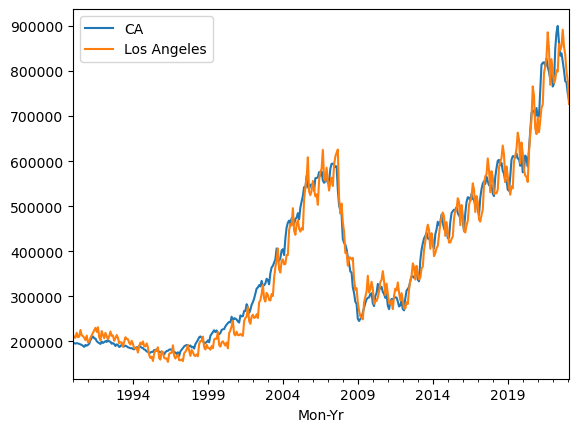

In [110]:
ladata.plot()

In [120]:
#renaming index
ladata.index.names = ['Date']

In [121]:
ladata.head(5)

,CA,Los Angeles
Date,,
1990-01-01,194952.0,215338.0
1990-02-01,196273.0,208399.0
1990-03-01,194856.0,208135.0
1990-04-01,196111.0,219004.0
1990-05-01,195281.0,209065.0


In [132]:
newerlaDate = ladata.loc["2005-01-01":]
newerlaDate["CA"].max()

900170.0

<AxesSubplot: xlabel='Date'>

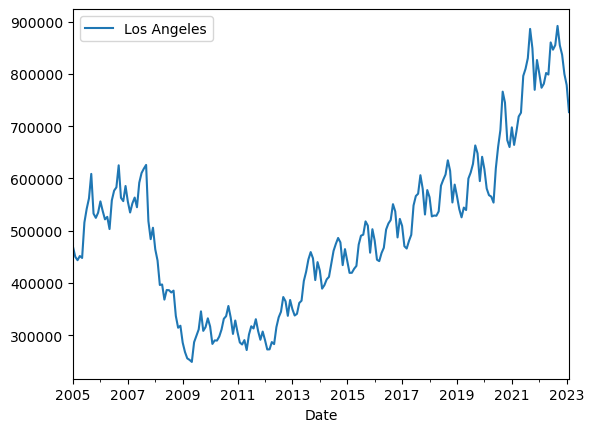

In [137]:
#newerlaDate.plot()
newerlaDate.plot(y="Los Angeles")

In [135]:
#getting all row values for largest values in a certain column
twolargest=newerlaDate.nlargest(2,['CA'])

In [134]:
twolargest

,CA,Los Angeles
Date,,
2022-05-01,900170.0,798720.0
2022-04-01,884890.0,801680.0


In [136]:
newerlaDate.median()

CA             509820.0
Los Angeles    497275.0
dtype: float64